# Скачать датасет - http://archive.ics.uci.edu/dataset/19/car+evaluation

In [36]:
import ssl
import urllib.request
from io import StringIO
import pandas as pd

def pd_read_csv_no_ssl(url, **kwargs):
    context = ssl._create_unverified_context()
    with urllib.request.urlopen(url, context=context) as response:
        data = response.read().decode()
        return pd.read_csv(StringIO(data), **kwargs)

try:
    url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data'
    column_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
    df = pd_read_csv_no_ssl(url, names=column_names)
    print(f"Размер: {df.shape}")
except Exception as e1:
    try:
        url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/car.csv'
        column_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
        df = pd_read_csv_no_ssl(url, names=column_names)
        print(f"Данные загружены альтернативным способом. Размер: {df.shape}")
        print(f"\nПервые 5 строк:")
        print(df.head())
    except Exception as e2:
        print(f"Ошибка загрузки: {e2}")
        print("Попытка загрузить локальный файл...")
        try:
            column_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
            df = pd.read_csv('car.data', names=column_names)
            print(f"Данные загружены из локального файла. Размер: {df.shape}")
            print(f"\nПервые 5 строк:")
            print(df.head())
        except Exception as e3:
            raise FileNotFoundError("Не удалось загрузить датасет. Пожалуйста, скачайте его вручную с http://archive.ics.uci.edu/dataset/19/car+evaluation")


Размер: (1728, 7)


# Провести EDA полученных данных

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
%matplotlib inline

In [38]:
print(f"\nРазмер датасета: {df.shape}")
print(f"Количество строк: {df.shape[0]}")
print(f"Количество столбцов: {df.shape[1]}")
print(f"\nНазвания столбцов: {list(df.columns)}")
print(f"\nТипы данных:")
print(df.dtypes)
print(f"\nПропущенные значения:", "\n", df.isnull().sum())
print(f"\nДубликаты: {df.duplicated().sum()}")



Размер датасета: (1728, 7)
Количество строк: 1728
Количество столбцов: 7

Названия столбцов: ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

Типы данных:
buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
class       object
dtype: object

Пропущенные значения: 
 buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

Дубликаты: 0


In [39]:
print("Первые 10 строк датасета:")
print(df.head(10))

print("Последние 10 строк датасета:")
print(df.tail(10))

Первые 10 строк датасета:
  buying  maint doors persons lug_boot safety  class
0  vhigh  vhigh     2       2    small    low  unacc
1  vhigh  vhigh     2       2    small    med  unacc
2  vhigh  vhigh     2       2    small   high  unacc
3  vhigh  vhigh     2       2      med    low  unacc
4  vhigh  vhigh     2       2      med    med  unacc
5  vhigh  vhigh     2       2      med   high  unacc
6  vhigh  vhigh     2       2      big    low  unacc
7  vhigh  vhigh     2       2      big    med  unacc
8  vhigh  vhigh     2       2      big   high  unacc
9  vhigh  vhigh     2       4    small    low  unacc
Последние 10 строк датасета:
     buying maint  doors persons lug_boot safety  class
1718    low   low  5more       4      big   high  vgood
1719    low   low  5more    more    small    low  unacc
1720    low   low  5more    more    small    med    acc
1721    low   low  5more    more    small   high   good
1722    low   low  5more    more      med    low  unacc
1723    low   low  5more  

In [40]:
# Уникальные значения
for col in df.columns:
    unique_vals = df[col].unique()
    print(f"\n{col}:")
    print(f"  Количество уникальных значений: {len(unique_vals)}")
    print(f"  Значения: {sorted(unique_vals)}")
    print(f"  Распределение:")
    print(df[col].value_counts().sort_index())



buying:
  Количество уникальных значений: 4
  Значения: ['high', 'low', 'med', 'vhigh']
  Распределение:
buying
high     432
low      432
med      432
vhigh    432
Name: count, dtype: int64

maint:
  Количество уникальных значений: 4
  Значения: ['high', 'low', 'med', 'vhigh']
  Распределение:
maint
high     432
low      432
med      432
vhigh    432
Name: count, dtype: int64

doors:
  Количество уникальных значений: 4
  Значения: ['2', '3', '4', '5more']
  Распределение:
doors
2        432
3        432
4        432
5more    432
Name: count, dtype: int64

persons:
  Количество уникальных значений: 3
  Значения: ['2', '4', 'more']
  Распределение:
persons
2       576
4       576
more    576
Name: count, dtype: int64

lug_boot:
  Количество уникальных значений: 3
  Значения: ['big', 'med', 'small']
  Распределение:
lug_boot
big      576
med      576
small    576
Name: count, dtype: int64

safety:
  Количество уникальных значений: 3
  Значения: ['high', 'low', 'med']
  Распределение:
saf

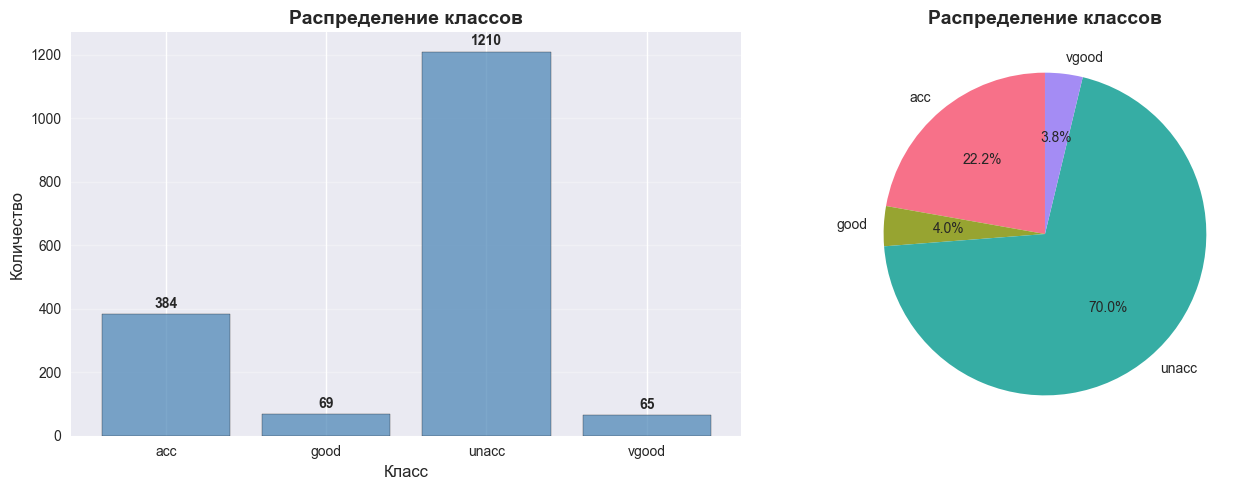


Статистика по классам:
class
acc       384
good       69
unacc    1210
vgood      65
Name: count, dtype: int64

Процентное распределение:
class
acc      22.22
good      3.99
unacc    70.02
vgood     3.76
Name: count, dtype: float64


In [41]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

class_counts = df['class'].value_counts().sort_index()
axes[0].bar(class_counts.index, class_counts.values, color='steelblue', alpha=0.7, edgecolor='black')
axes[0].set_xlabel('Класс', fontsize=12)
axes[0].set_ylabel('Количество', fontsize=12)
axes[0].set_title('Распределение классов', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3, axis='y')
for i, v in enumerate(class_counts.values):
    axes[0].text(i, v + 10, str(v), ha='center', va='bottom', fontweight='bold')

axes[1].pie(class_counts.values, labels=class_counts.index, autopct='%1.1f%%', 
            startangle=90, colors=sns.color_palette("husl", len(class_counts)))
axes[1].set_title('Распределение классов', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

print(f"\nСтатистика по классам:")
print(class_counts)
print(f"\nПроцентное распределение:")
print((class_counts / len(df) * 100).round(2))


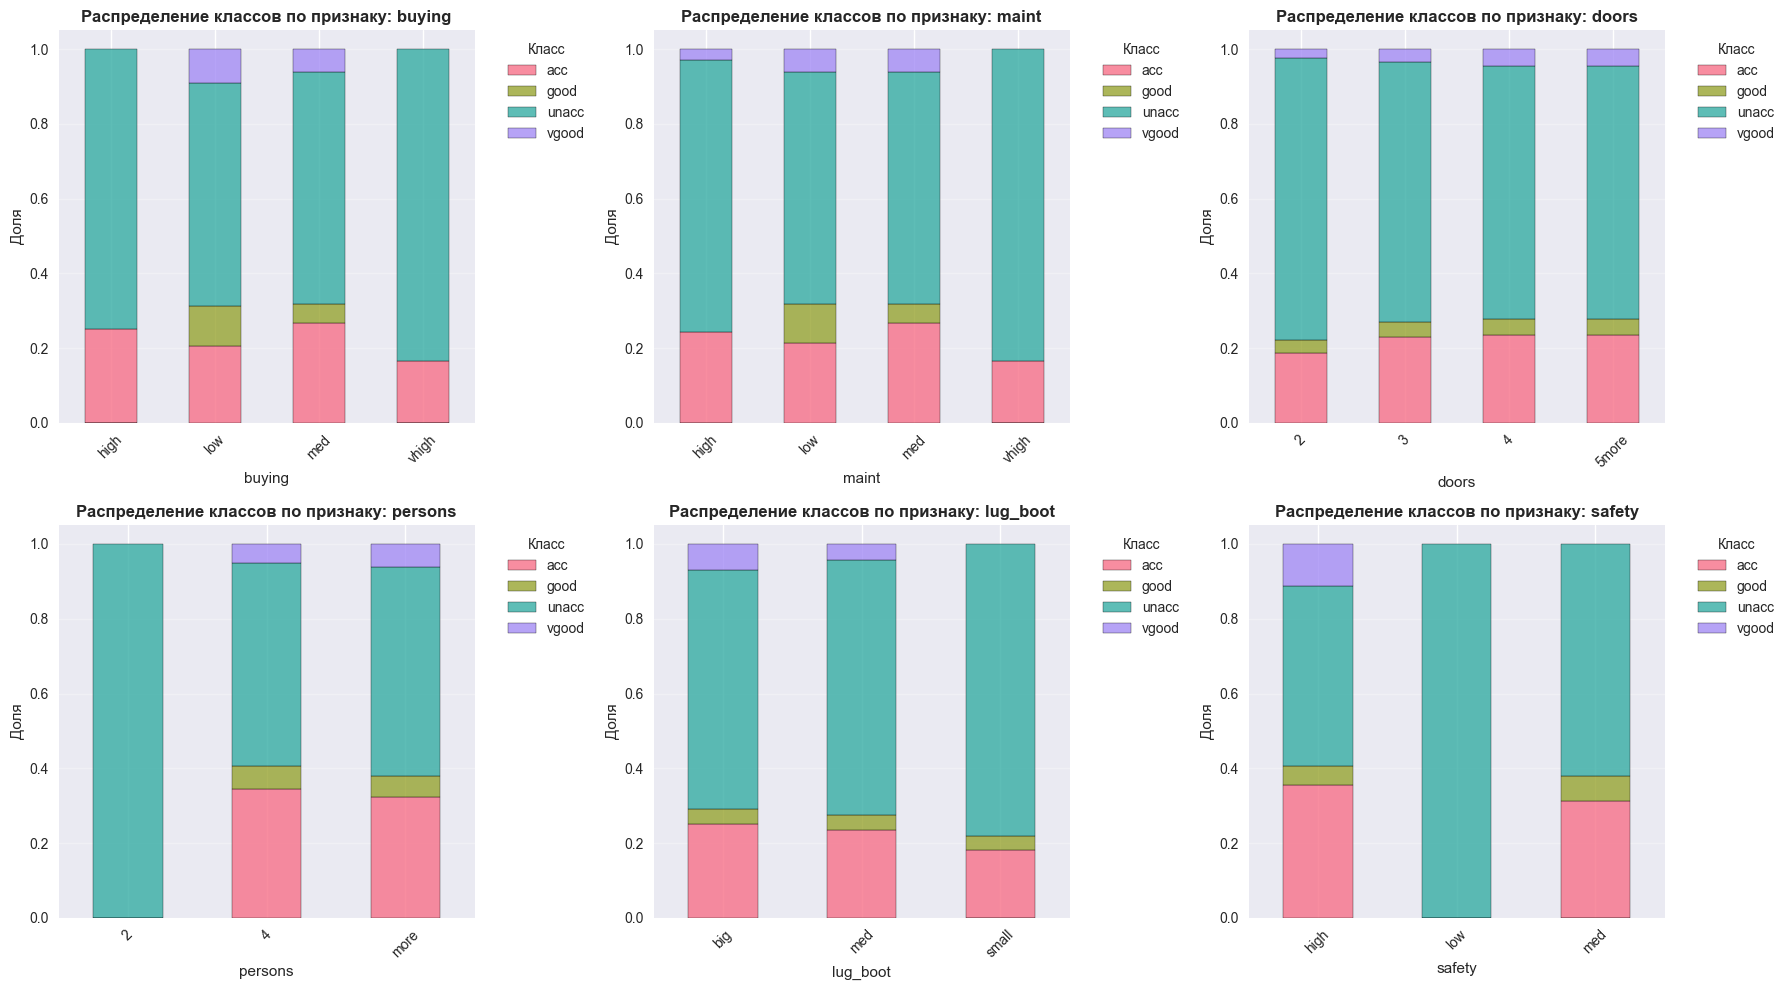

In [42]:
# Анализ взаимосвязи между признаками и целевой переменной
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for idx, col in enumerate(df.columns[:-1]):
    crosstab = pd.crosstab(df[col], df['class'])
    
    crosstab_norm = crosstab.div(crosstab.sum(axis=1), axis=0)
    
    crosstab_norm.plot(kind='bar', stacked=True, ax=axes[idx], 
                       color=sns.color_palette("husl", len(crosstab.columns)),
                       edgecolor='black', alpha=0.8)
    axes[idx].set_xlabel(col, fontsize=11)
    axes[idx].set_ylabel('Доля', fontsize=11)
    axes[idx].set_title(f'Распределение классов по признаку: {col}', fontsize=12, fontweight='bold')
    axes[idx].legend(title='Класс', bbox_to_anchor=(1.05, 1), loc='upper left')
    axes[idx].grid(True, alpha=0.3, axis='y')
    axes[idx].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


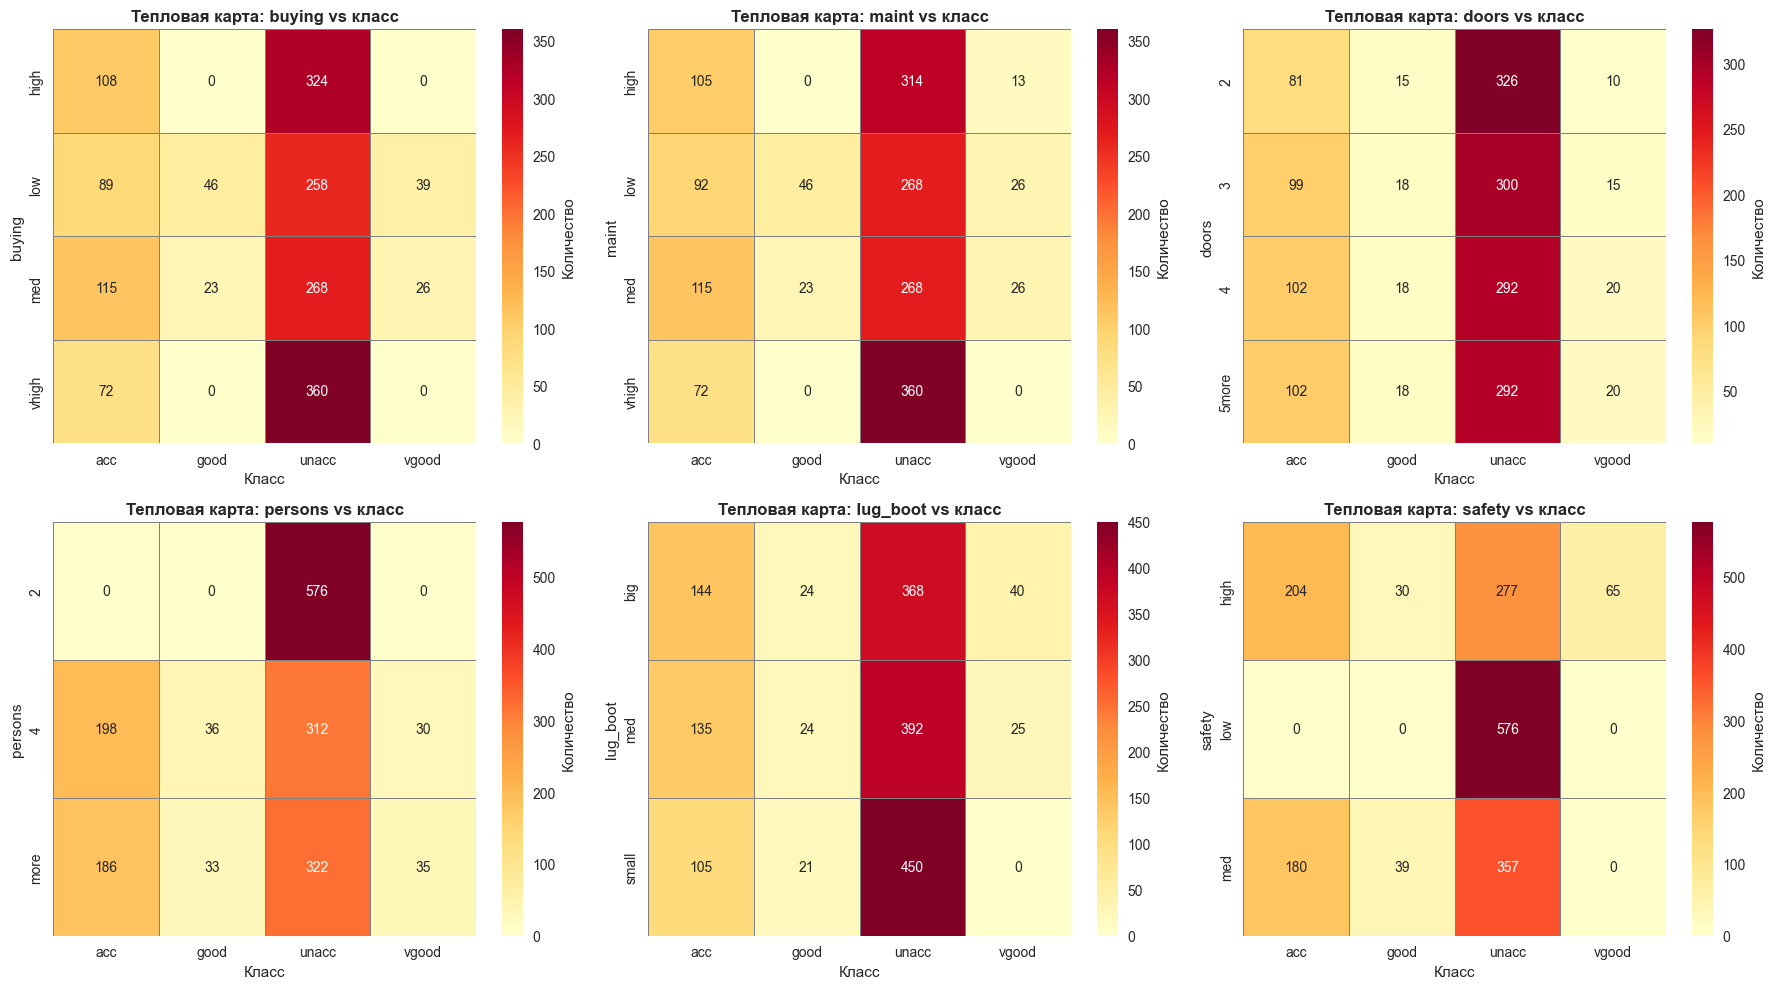

In [43]:
# crosstab для каждого признака с классом

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for idx, col in enumerate(df.columns[:-1]):
    crosstab = pd.crosstab(df[col], df['class'])
    
    sns.heatmap(crosstab, annot=True, fmt='d', cmap='YlOrRd', ax=axes[idx],
                cbar_kws={'label': 'Количество'}, linewidths=0.5, linecolor='gray')
    axes[idx].set_xlabel('Класс', fontsize=11)
    axes[idx].set_ylabel(col, fontsize=11)
    axes[idx].set_title(f'Тепловая карта: {col} vs класс', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()


In [44]:
# Статистический анализ распределений

for col in df.columns[:-1]:
    print(f"\n{col}:")
    value_counts = df[col].value_counts().sort_index()
    print(f"  Распределение:")
    for val, count in value_counts.items():
        pct = (count / len(df)) * 100
        print(f"    {val}: {count} ({pct:.2f}%)")
    
    # Анализ по классам
    print(f"  Распределение по классам:")
    for val in sorted(df[col].unique()):
        subset = df[df[col] == val]
        class_dist = subset['class'].value_counts().sort_index()
        print(f"    {val}:")
        for cls, cnt in class_dist.items():
            pct = (cnt / len(subset)) * 100
            print(f"      {cls}: {cnt} ({pct:.2f}%)")



buying:
  Распределение:
    high: 432 (25.00%)
    low: 432 (25.00%)
    med: 432 (25.00%)
    vhigh: 432 (25.00%)
  Распределение по классам:
    high:
      acc: 108 (25.00%)
      unacc: 324 (75.00%)
    low:
      acc: 89 (20.60%)
      good: 46 (10.65%)
      unacc: 258 (59.72%)
      vgood: 39 (9.03%)
    med:
      acc: 115 (26.62%)
      good: 23 (5.32%)
      unacc: 268 (62.04%)
      vgood: 26 (6.02%)
    vhigh:
      acc: 72 (16.67%)
      unacc: 360 (83.33%)

maint:
  Распределение:
    high: 432 (25.00%)
    low: 432 (25.00%)
    med: 432 (25.00%)
    vhigh: 432 (25.00%)
  Распределение по классам:
    high:
      acc: 105 (24.31%)
      unacc: 314 (72.69%)
      vgood: 13 (3.01%)
    low:
      acc: 92 (21.30%)
      good: 46 (10.65%)
      unacc: 268 (62.04%)
      vgood: 26 (6.02%)
    med:
      acc: 115 (26.62%)
      good: 23 (5.32%)
      unacc: 268 (62.04%)
      vgood: 26 (6.02%)
    vhigh:
      acc: 72 (16.67%)
      unacc: 360 (83.33%)

doors:
  Распределение

In [45]:
# Анализ комбинаций признаков
print("=" * 60)
print("АНАЛИЗ КОМБИНАЦИЙ ПРИЗНАКОВ")
print("=" * 60)

print("\nКомбинация buying и maint:")
combo1 = pd.crosstab([df['buying'], df['maint']], df['class'], margins=True)
print(combo1)

print("\n\nКомбинация safety и persons:")
combo2 = pd.crosstab([df['safety'], df['persons']], df['class'], margins=True)
print(combo2)


АНАЛИЗ КОМБИНАЦИЙ ПРИЗНАКОВ

Комбинация buying и maint:
class         acc  good  unacc  vgood   All
buying maint                               
high   high    36     0     72      0   108
       low     36     0     72      0   108
       med     36     0     72      0   108
       vhigh    0     0    108      0   108
low    high    33     0     62     13   108
       low     10    23     62     13   108
       med     10    23     62     13   108
       vhigh   36     0     72      0   108
med    high    36     0     72      0   108
       low     10    23     62     13   108
       med     33     0     62     13   108
       vhigh   36     0     72      0   108
vhigh  high     0     0    108      0   108
       low     36     0     72      0   108
       med     36     0     72      0   108
       vhigh    0     0    108      0   108
All           384    69   1210     65  1728


Комбинация safety и persons:
class           acc  good  unacc  vgood   All
safety persons                 

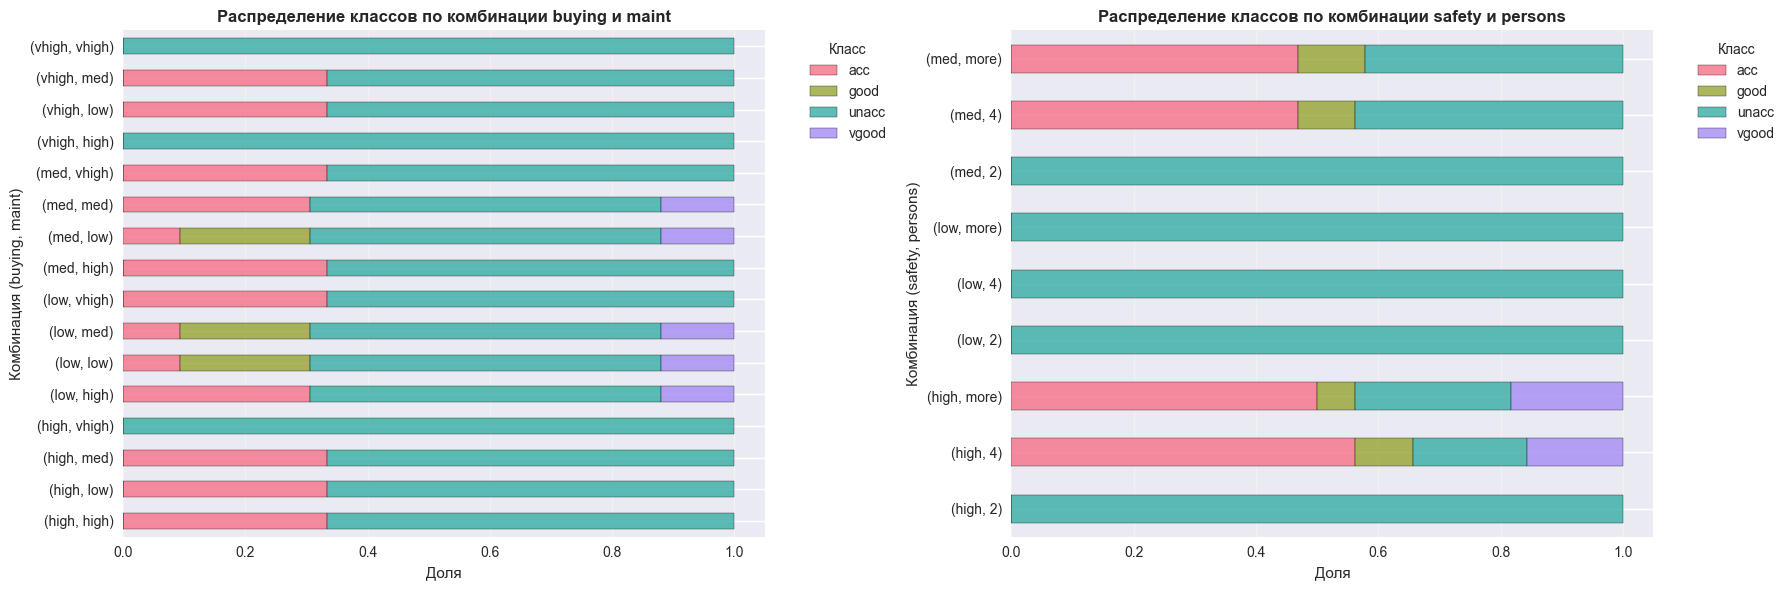

In [46]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

combo1 = pd.crosstab([df['buying'], df['maint']], df['class'])
combo1_norm = combo1.div(combo1.sum(axis=1), axis=0)
combo1_norm.plot(kind='barh', stacked=True, ax=axes[0], 
                 color=sns.color_palette("husl", len(combo1.columns)),
                 edgecolor='black', alpha=0.8)
axes[0].set_xlabel('Доля', fontsize=11)
axes[0].set_ylabel('Комбинация (buying, maint)', fontsize=11)
axes[0].set_title('Распределение классов по комбинации buying и maint', fontsize=12, fontweight='bold')
axes[0].legend(title='Класс', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[0].grid(True, alpha=0.3, axis='x')

combo2 = pd.crosstab([df['safety'], df['persons']], df['class'])
combo2_norm = combo2.div(combo2.sum(axis=1), axis=0)
combo2_norm.plot(kind='barh', stacked=True, ax=axes[1],
                 color=sns.color_palette("husl", len(combo2.columns)),
                 edgecolor='black', alpha=0.8)
axes[1].set_xlabel('Доля', fontsize=11)
axes[1].set_ylabel('Комбинация (safety, persons)', fontsize=11)
axes[1].set_title('Распределение классов по комбинации safety и persons', fontsize=12, fontweight='bold')
axes[1].legend(title='Класс', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[1].grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.show()


In [47]:
# Итог

# Все признаки являются категориальными
# Пропущенных значений нет
# Датасет несбалансирован по классам
# Признаки имеют разное количество категорий
# Есть явные зависимости между признаками и целевой переменной


# Используя метод xgboost и train_test_split обучить классификатор на 70% данных

In [48]:
# Установка xgboost (если не установлен)
%pip install xgboost

# Импорт необходимых библиотек для машинного обучения
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import os
import subprocess

import xgboost as xgb


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [49]:
# кодирование категориальных признаков

df_ml = df.copy()

X = df_ml.drop('class', axis=1)
y = df_ml['class']

print(f"\nПризнаки (X): {X.shape}")
print(f"Целевая переменная (y): {y.shape}")
print(f"\nПризнаки: {list(X.columns)}")

label_encoders = {}
X_encoded = X.copy()

for col in X.columns:
    le = LabelEncoder()
    X_encoded[col] = le.fit_transform(X[col])
    label_encoders[col] = le
    print(f"\n{col}:")
    print(f"  Уникальные значения: {sorted(X[col].unique())}")
    print(f"  Закодированные значения: {sorted(X_encoded[col].unique())}")

le_target = LabelEncoder()
y_encoded = le_target.fit_transform(y)

print(f"\n\nЦелевая переменная (class):")
print(f"  Уникальные значения: {sorted(y.unique())}")
print(f"  Закодированные значения: {sorted(y_encoded)}")
print(f"  Соответствие:")
for i, cls in enumerate(sorted(y.unique())):
    encoded_val = le_target.transform([cls])[0]
    print(f"    {cls} -> {encoded_val}")

print(f"\nДанные подготовлены для обучения!")


Признаки (X): (1728, 6)
Целевая переменная (y): (1728,)

Признаки: ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety']

buying:
  Уникальные значения: ['high', 'low', 'med', 'vhigh']
  Закодированные значения: [np.int64(0), np.int64(1), np.int64(2), np.int64(3)]

maint:
  Уникальные значения: ['high', 'low', 'med', 'vhigh']
  Закодированные значения: [np.int64(0), np.int64(1), np.int64(2), np.int64(3)]

doors:
  Уникальные значения: ['2', '3', '4', '5more']
  Закодированные значения: [np.int64(0), np.int64(1), np.int64(2), np.int64(3)]

persons:
  Уникальные значения: ['2', '4', 'more']
  Закодированные значения: [np.int64(0), np.int64(1), np.int64(2)]

lug_boot:
  Уникальные значения: ['big', 'med', 'small']
  Закодированные значения: [np.int64(0), np.int64(1), np.int64(2)]

safety:
  Уникальные значения: ['high', 'low', 'med']
  Закодированные значения: [np.int64(0), np.int64(1), np.int64(2)]


Целевая переменная (class):
  Уникальные значения: ['acc', 'good', 'unacc', 'vg

In [50]:
# Разделение данных на обучающую и тестовую выборки (70% / 30%)
print("=" * 60)
print("РАЗДЕЛЕНИЕ ДАННЫХ")
print("=" * 60)

X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y_encoded, 
    test_size=0.3, 
    random_state=42, 
    stratify=y_encoded  # Сохраняем пропорции классов
)

print(f"\nРазмер обучающей выборки: {X_train.shape[0]} ({X_train.shape[0]/len(df)*100:.1f}%)")
print(f"Размер тестовой выборки: {X_test.shape[0]} ({X_test.shape[0]/len(df)*100:.1f}%)")
print(f"\nРаспределение классов в обучающей выборке:")
train_class_dist = pd.Series(y_train).value_counts().sort_index()
for encoded_val, count in train_class_dist.items():
    original_class = le_target.inverse_transform([encoded_val])[0]
    pct = (count / len(y_train)) * 100
    print(f"  {original_class} (код {encoded_val}): {count} ({pct:.2f}%)")

print(f"\nРаспределение классов в тестовой выборке:")
test_class_dist = pd.Series(y_test).value_counts().sort_index()
for encoded_val, count in test_class_dist.items():
    original_class = le_target.inverse_transform([encoded_val])[0]
    pct = (count / len(y_test)) * 100
    print(f"  {original_class} (код {encoded_val}): {count} ({pct:.2f}%)")


РАЗДЕЛЕНИЕ ДАННЫХ

Размер обучающей выборки: 1209 (70.0%)
Размер тестовой выборки: 519 (30.0%)

Распределение классов в обучающей выборке:
  acc (код 0): 269 (22.25%)
  good (код 1): 48 (3.97%)
  unacc (код 2): 847 (70.06%)
  vgood (код 3): 45 (3.72%)

Распределение классов в тестовой выборке:
  acc (код 0): 115 (22.16%)
  good (код 1): 21 (4.05%)
  unacc (код 2): 363 (69.94%)
  vgood (код 3): 20 (3.85%)


In [51]:
# Обучение XGBoost

xgb_classifier = xgb.XGBClassifier(
    random_state=42,
    eval_metric='mlogloss',  # Метрика для многоклассовой классификации
    use_label_encoder=False,
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1
)

xgb_classifier.fit(X_train, y_train)

print(f"  Количество деревьев: {xgb_classifier.n_estimators}")
print(f"  Максимальная глубина: {xgb_classifier.max_depth}")
print(f"  Скорость обучения: {xgb_classifier.learning_rate}")
print(f"  Количество признаков: {X_train.shape[1]}")
print(f"  Количество классов: {len(le_target.classes_)}")


  Количество деревьев: 100
  Максимальная глубина: 6
  Скорость обучения: 0.1
  Количество признаков: 6
  Количество классов: 4


In [52]:
# Предсказания на обучающей и тестовой выборках

y_train_pred = xgb_classifier.predict(X_train)
y_test_pred = xgb_classifier.predict(X_test)

print(f"\nПримеры предсказаний на тестовой выборке (первые 10):")
print("Истинный класс | Предсказанный класс")
print("-" * 40)
for i in range(min(10, len(y_test))):
    true_val = y_test[i] if isinstance(y_test, (list, np.ndarray)) else y_test.iloc[i]
    true_class = le_target.inverse_transform([true_val])[0]
    pred_class = le_target.inverse_transform([y_test_pred[i]])[0]
    match = "✓" if true_val == y_test_pred[i] else "✗"
    print(f"{true_class:15s} | {pred_class:15s} {match}")



Примеры предсказаний на тестовой выборке (первые 10):
Истинный класс | Предсказанный класс
----------------------------------------
acc             | acc             ✓
unacc           | unacc           ✓
vgood           | vgood           ✓
acc             | acc             ✓
unacc           | unacc           ✓
unacc           | unacc           ✓
unacc           | unacc           ✓
unacc           | unacc           ✓
acc             | acc             ✓
unacc           | unacc           ✓


In [53]:
# Оценка качества модели

train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"\nТочность на обучающей выборке: {train_accuracy:.4f} ({train_accuracy*100:.2f}%)")

test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Точность на тестовой выборке: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")

print("\n", classification_report(y_test, y_test_pred, 
                                  target_names=le_target.classes_))



Точность на обучающей выборке: 0.9992 (99.92%)
Точность на тестовой выборке: 0.9807 (98.07%)

               precision    recall  f1-score   support

         acc       0.93      0.99      0.96       115
        good       1.00      0.95      0.98        21
       unacc       1.00      0.98      0.99       363
       vgood       1.00      1.00      1.00        20

    accuracy                           0.98       519
   macro avg       0.98      0.98      0.98       519
weighted avg       0.98      0.98      0.98       519




Матрица ошибок:
       acc  good  unacc  vgood
acc    114     0      1      0
good     1    20      0      0
unacc    8     0    355      0
vgood    0     0      0     20


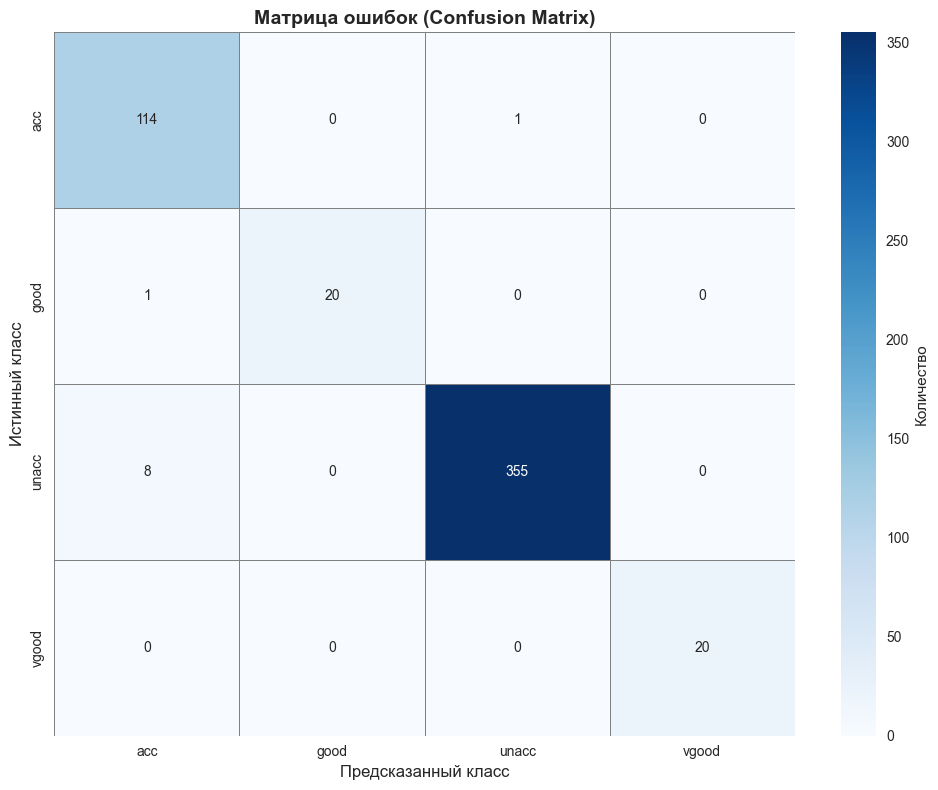


Анализ ошибок:
  Всего ошибок: 10 из 519 (1.93%)
  Правильных предсказаний: 509 из 519 (98.07%)


In [54]:
# Матрица ошибок

cm = confusion_matrix(y_test, y_test_pred)
cm_df = pd.DataFrame(cm, 
                     index=le_target.classes_, 
                     columns=le_target.classes_)

print("\nМатрица ошибок:")
print(cm_df)

plt.figure(figsize=(10, 8))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues', 
            cbar_kws={'label': 'Количество'}, 
            linewidths=0.5, linecolor='gray')
plt.title('Матрица ошибок (Confusion Matrix)', fontsize=14, fontweight='bold')
plt.xlabel('Предсказанный класс', fontsize=12)
plt.ylabel('Истинный класс', fontsize=12)
plt.tight_layout()
plt.show()

print(f"\nАнализ ошибок:")
total_errors = cm.sum() - np.trace(cm)
print(f"  Всего ошибок: {total_errors} из {len(y_test)} ({total_errors/len(y_test)*100:.2f}%)")
print(f"  Правильных предсказаний: {np.trace(cm)} из {len(y_test)} ({np.trace(cm)/len(y_test)*100:.2f}%)")



Важность признаков:
 Признак  Важность
 persons  0.338202
  safety  0.306540
   maint  0.116204
  buying  0.115803
lug_boot  0.084100
   doors  0.039151


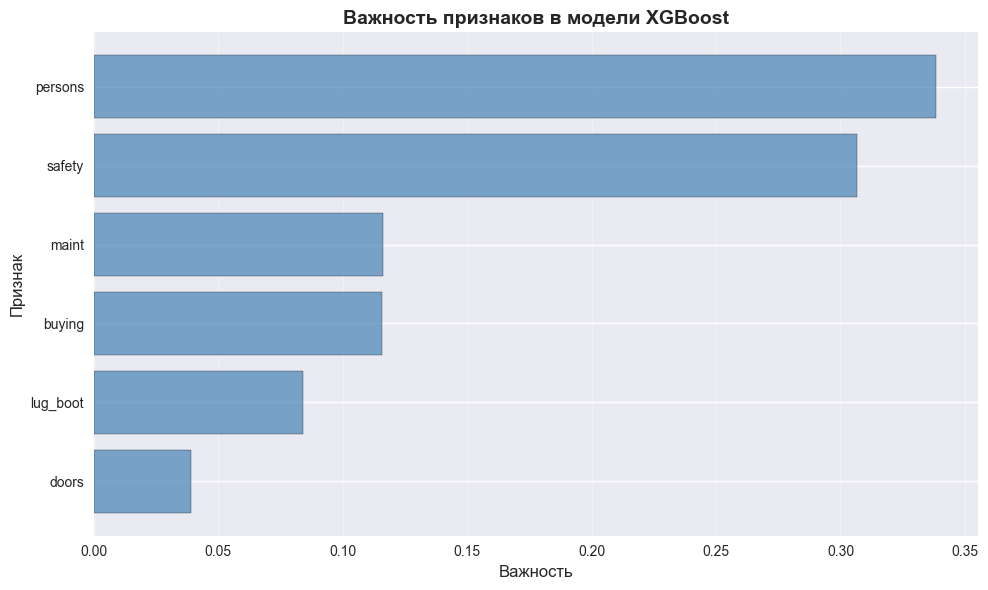

In [55]:
# Важность признаков

feature_importance = pd.DataFrame({
    'Признак': X.columns,
    'Важность': xgb_classifier.feature_importances_
}).sort_values('Важность', ascending=False)

print("\nВажность признаков:")
print(feature_importance.to_string(index=False))

plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Признак'], feature_importance['Важность'], 
         color='steelblue', alpha=0.7, edgecolor='black')
plt.xlabel('Важность', fontsize=12)
plt.ylabel('Признак', fontsize=12)
plt.title('Важность признаков в модели XGBoost', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()


## Расчет метрики F-score


In [56]:
from sklearn.metrics import f1_score, precision_score, recall_score, precision_recall_fscore_support



Метрики для каждого класса:
Класс  Precision   Recall  F1-Score
  acc   0.926829 0.991304  0.957983
 good   1.000000 0.952381  0.975610
unacc   0.997191 0.977961  0.987483
vgood   1.000000 1.000000  1.000000


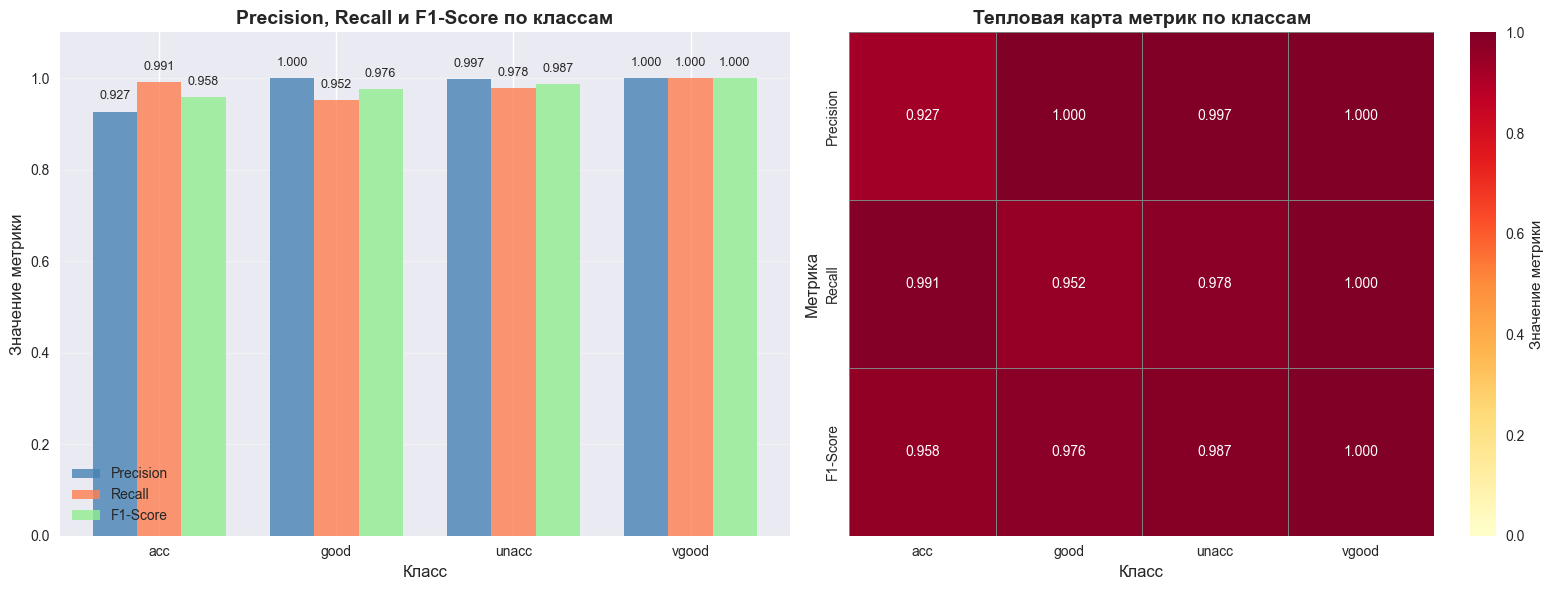

In [57]:

# F1-score для каждого класса
f1_per_class = f1_score(y_test, y_test_pred, average=None, labels=range(len(le_target.classes_)))
precision_per_class = precision_score(y_test, y_test_pred, average=None, labels=range(len(le_target.classes_)))
recall_per_class = recall_score(y_test, y_test_pred, average=None, labels=range(len(le_target.classes_)))

metrics_df = pd.DataFrame({
    'Класс': le_target.classes_,
    'Precision': precision_per_class,
    'Recall': recall_per_class,
    'F1-Score': f1_per_class
})

print("\nМетрики для каждого класса:")
print(metrics_df.to_string(index=False))

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

x = np.arange(len(le_target.classes_))
width = 0.25

axes[0].bar(x - width, precision_per_class, width, label='Precision', alpha=0.8, color='steelblue')
axes[0].bar(x, recall_per_class, width, label='Recall', alpha=0.8, color='coral')
axes[0].bar(x + width, f1_per_class, width, label='F1-Score', alpha=0.8, color='lightgreen')

axes[0].set_xlabel('Класс', fontsize=12)
axes[0].set_ylabel('Значение метрики', fontsize=12)
axes[0].set_title('Precision, Recall и F1-Score по классам', fontsize=14, fontweight='bold')
axes[0].set_xticks(x)
axes[0].set_xticklabels(le_target.classes_)
axes[0].legend()
axes[0].grid(True, alpha=0.3, axis='y')
axes[0].set_ylim([0, 1.1])

for i, (p, r, f) in enumerate(zip(precision_per_class, recall_per_class, f1_per_class)):
    axes[0].text(i - width, p + 0.02, f'{p:.3f}', ha='center', va='bottom', fontsize=9)
    axes[0].text(i, r + 0.02, f'{r:.3f}', ha='center', va='bottom', fontsize=9)
    axes[0].text(i + width, f + 0.02, f'{f:.3f}', ha='center', va='bottom', fontsize=9)

metrics_matrix = np.array([precision_per_class, recall_per_class, f1_per_class])
sns.heatmap(metrics_matrix, 
            annot=True, 
            fmt='.3f', 
            cmap='YlOrRd',
            xticklabels=le_target.classes_,
            yticklabels=['Precision', 'Recall', 'F1-Score'],
            ax=axes[1],
            cbar_kws={'label': 'Значение метрики'},
            linewidths=0.5,
            linecolor='gray',
            vmin=0,
            vmax=1)
axes[1].set_title('Тепловая карта метрик по классам', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Класс', fontsize=12)
axes[1].set_ylabel('Метрика', fontsize=12)

plt.tight_layout()
plt.show()



Агрегированные метрики:
  Метрика    Macro    Micro  Weighted
Precision 0.981005 0.980732  0.981822
   Recall 0.980412 0.980732  0.980732
 F1-Score 0.980269 0.980732  0.980948


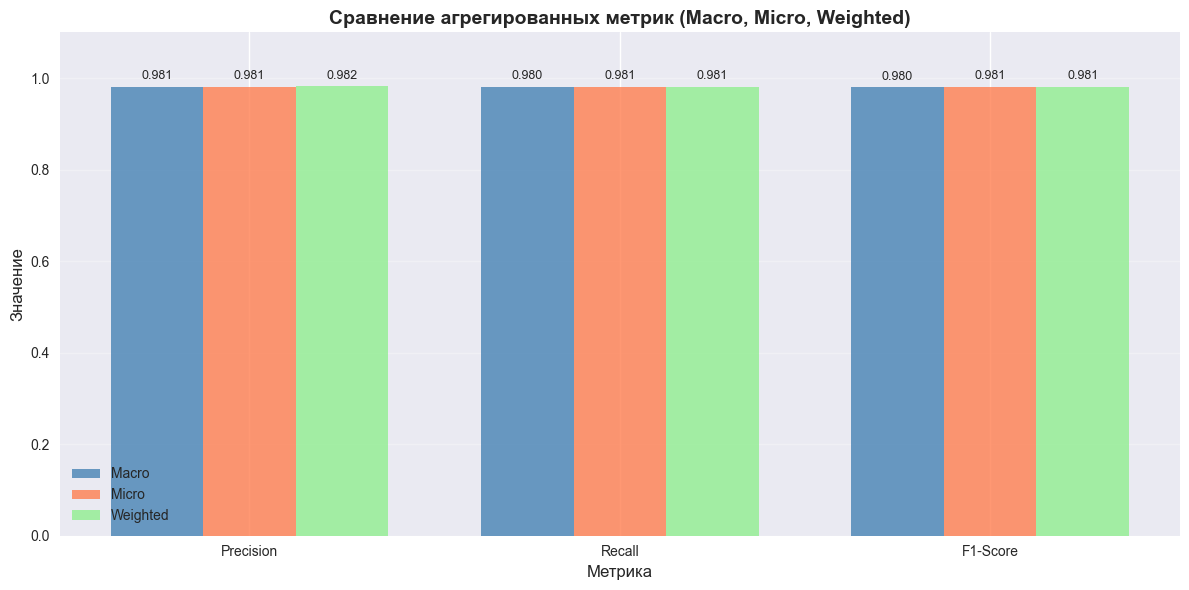

In [58]:
f1_macro = f1_score(y_test, y_test_pred, average='macro')
precision_macro = precision_score(y_test, y_test_pred, average='macro')
recall_macro = recall_score(y_test, y_test_pred, average='macro')

f1_micro = f1_score(y_test, y_test_pred, average='micro')
precision_micro = precision_score(y_test, y_test_pred, average='micro')
recall_micro = recall_score(y_test, y_test_pred, average='micro')

f1_weighted = f1_score(y_test, y_test_pred, average='weighted')
precision_weighted = precision_score(y_test, y_test_pred, average='weighted')
recall_weighted = recall_score(y_test, y_test_pred, average='weighted')

aggregated_metrics = pd.DataFrame({
    'Метрика': ['Precision', 'Recall', 'F1-Score'],
    'Macro': [precision_macro, recall_macro, f1_macro],
    'Micro': [precision_micro, recall_micro, f1_micro],
    'Weighted': [precision_weighted, recall_weighted, f1_weighted]
})

print("\nАгрегированные метрики:")
print(aggregated_metrics.to_string(index=False))

fig, ax = plt.subplots(figsize=(12, 6))

x = np.arange(len(aggregated_metrics))
width = 0.25

ax.bar(x - width, aggregated_metrics['Macro'], width, label='Macro', alpha=0.8, color='steelblue')
ax.bar(x, aggregated_metrics['Micro'], width, label='Micro', alpha=0.8, color='coral')
ax.bar(x + width, aggregated_metrics['Weighted'], width, label='Weighted', alpha=0.8, color='lightgreen')

ax.set_xlabel('Метрика', fontsize=12)
ax.set_ylabel('Значение', fontsize=12)
ax.set_title('Сравнение агрегированных метрик (Macro, Micro, Weighted)', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(aggregated_metrics['Метрика'])
ax.legend()
ax.grid(True, alpha=0.3, axis='y')
ax.set_ylim([0, 1.1])

for i, row in aggregated_metrics.iterrows():
    ax.text(i - width, row['Macro'] + 0.01, f"{row['Macro']:.3f}", ha='center', va='bottom', fontsize=9)
    ax.text(i, row['Micro'] + 0.01, f"{row['Micro']:.3f}", ha='center', va='bottom', fontsize=9)
    ax.text(i + width, row['Weighted'] + 0.01, f"{row['Weighted']:.3f}", ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()


In [59]:
# расчет precision, recall, f1-score и support для каждого класса

precision, recall, f1, support = precision_recall_fscore_support(
    y_test, y_test_pred, 
    labels=range(len(le_target.classes_)),
    zero_division=0
)

detailed_metrics = pd.DataFrame({
    'Класс': le_target.classes_,
    'Precision': precision,
    'Recall': recall,
    'F1-Score': f1,
    'Support': support
})

print("\nДетальные метрики с количеством образцов (Support):")
print(detailed_metrics.to_string(index=False))

print("\nПроцентное распределение образцов по классам в тестовой выборке:")
for idx, row in detailed_metrics.iterrows():
    pct = (row['Support'] / len(y_test)) * 100
    print(f"  {row['Класс']}: {row['Support']} образцов ({pct:.2f}%)")



Детальные метрики с количеством образцов (Support):
Класс  Precision   Recall  F1-Score  Support
  acc   0.926829 0.991304  0.957983      115
 good   1.000000 0.952381  0.975610       21
unacc   0.997191 0.977961  0.987483      363
vgood   1.000000 1.000000  1.000000       20

Процентное распределение образцов по классам в тестовой выборке:
  acc: 115 образцов (22.16%)
  good: 21 образцов (4.05%)
  unacc: 363 образцов (69.94%)
  vgood: 20 образцов (3.85%)



Сравнение метрик:
Выборка  F1-Score (Macro)  F1-Score (Micro)  F1-Score (Weighted)  Accuracy
  Train          0.999389          0.999173             0.999173  0.999173
   Test          0.980269          0.980732             0.980948  0.980732


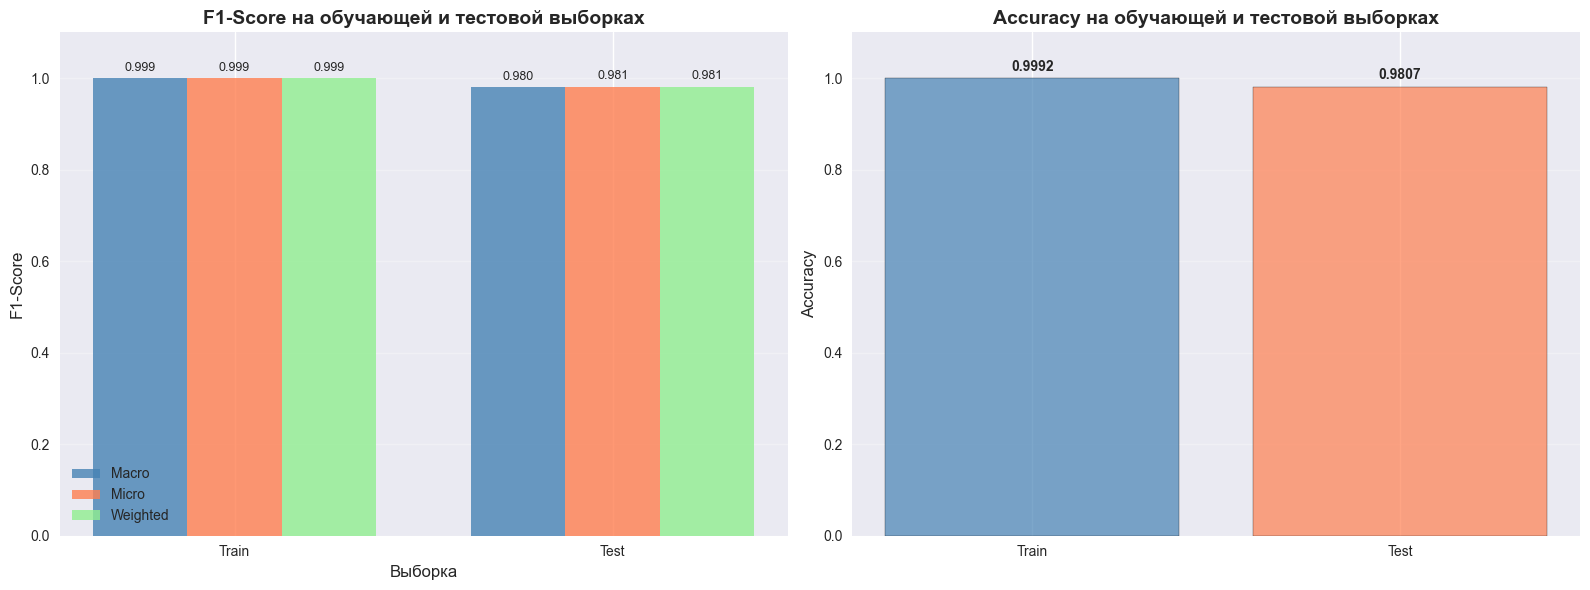

In [60]:
# Сравнение метрик на обучающей и тестовой выборках

f1_train_macro = f1_score(y_train, y_train_pred, average='macro')
f1_train_micro = f1_score(y_train, y_train_pred, average='micro')
f1_train_weighted = f1_score(y_train, y_train_pred, average='weighted')

comparison_df = pd.DataFrame({
    'Выборка': ['Train', 'Test'],
    'F1-Score (Macro)': [f1_train_macro, f1_macro],
    'F1-Score (Micro)': [f1_train_micro, f1_micro],
    'F1-Score (Weighted)': [f1_train_weighted, f1_weighted],
    'Accuracy': [train_accuracy, test_accuracy]
})

print("\nСравнение метрик:")
print(comparison_df.to_string(index=False))

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

x = np.arange(len(comparison_df))
width = 0.25

axes[0].bar(x - width, comparison_df['F1-Score (Macro)'], width, label='Macro', alpha=0.8, color='steelblue')
axes[0].bar(x, comparison_df['F1-Score (Micro)'], width, label='Micro', alpha=0.8, color='coral')
axes[0].bar(x + width, comparison_df['F1-Score (Weighted)'], width, label='Weighted', alpha=0.8, color='lightgreen')

axes[0].set_xlabel('Выборка', fontsize=12)
axes[0].set_ylabel('F1-Score', fontsize=12)
axes[0].set_title('F1-Score на обучающей и тестовой выборках', fontsize=14, fontweight='bold')
axes[0].set_xticks(x)
axes[0].set_xticklabels(comparison_df['Выборка'])
axes[0].legend()
axes[0].grid(True, alpha=0.3, axis='y')
axes[0].set_ylim([0, 1.1])

for i, row in comparison_df.iterrows():
    axes[0].text(i - width, row['F1-Score (Macro)'] + 0.01, f"{row['F1-Score (Macro)']:.3f}", 
                ha='center', va='bottom', fontsize=9)
    axes[0].text(i, row['F1-Score (Micro)'] + 0.01, f"{row['F1-Score (Micro)']:.3f}", 
                ha='center', va='bottom', fontsize=9)
    axes[0].text(i + width, row['F1-Score (Weighted)'] + 0.01, f"{row['F1-Score (Weighted)']:.3f}", 
                ha='center', va='bottom', fontsize=9)

axes[1].bar(comparison_df['Выборка'], comparison_df['Accuracy'], 
            alpha=0.7, color=['steelblue', 'coral'], edgecolor='black')
axes[1].set_ylabel('Accuracy', fontsize=12)
axes[1].set_title('Accuracy на обучающей и тестовой выборках', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3, axis='y')
axes[1].set_ylim([0, 1.1])

for i, row in comparison_df.iterrows():
    axes[1].text(i, row['Accuracy'] + 0.01, f"{row['Accuracy']:.4f}", 
                ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()


# Оптимизация гиперпараметров с помощью Optuna

In [61]:
%pip install optuna

import optuna
from optuna import Trial


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [62]:
X_train_opt, X_test_opt, y_train_opt, y_test_opt = train_test_split(
    X_encoded, y_encoded,
    test_size=0.3,
    random_state=42,
    stratify=y_encoded
)

print(f"\nРазмер обучающей выборки: {X_train_opt.shape[0]} ({X_train_opt.shape[0]/len(df)*100:.1f}%)")
print(f"Размер тестовой выборки: {X_test_opt.shape[0]} ({X_test_opt.shape[0]/len(df)*100:.1f}%)")


Размер обучающей выборки: 1209 (70.0%)
Размер тестовой выборки: 519 (30.0%)


In [63]:
def objective(trial: Trial) -> float:
    """
    Функция для оптимизации гиперпараметров XGBoost.
    Возвращает F1-score (weighted) на тестовой выборке.
    """
    max_depth = trial.suggest_categorical('max_depth', [3, 6, 9])
    eta = trial.suggest_categorical('eta', [0.01, 0.1, 0.3])
    gamma = trial.suggest_categorical('gamma', [0, 0.1, 0.5])
    
    model = xgb.XGBClassifier(
        max_depth=max_depth,
        eta=eta,
        gamma=gamma,
        random_state=42,
        eval_metric='mlogloss',
        use_label_encoder=False,
        n_estimators=100
    )
    
    model.fit(X_train_opt, y_train_opt)
    
    y_pred = model.predict(X_test_opt)
    
    f1 = f1_score(y_test_opt, y_pred, average='weighted')
    
    return f1

In [64]:
search_space = {
    'max_depth': [3, 6, 9],
    'eta': [0.01, 0.1, 0.3],
    'gamma': [0, 0.1, 0.5]
}

study = optuna.create_study(
    direction='maximize',  # Максимизируем F1-score
    study_name='xgb_optimization',
    sampler=optuna.samplers.GridSampler(search_space)  # Используем GridSampler для перебора всех комбинаций
)

study.optimize(objective, n_trials=27, show_progress_bar=True)

[I 2025-11-24 21:36:21,466] A new study created in memory with name: xgb_optimization
Best trial: 0. Best value: 0.963161:   4%|▎         | 1/27 [00:01<00:28,  1.08s/it]

[I 2025-11-24 21:36:22,550] Trial 0 finished with value: 0.9631610973919683 and parameters: {'max_depth': 9, 'eta': 0.01, 'gamma': 0}. Best is trial 0 with value: 0.9631610973919683.


Best trial: 1. Best value: 0.967299:   7%|▋         | 2/27 [00:01<00:15,  1.66it/s]

[I 2025-11-24 21:36:22,813] Trial 1 finished with value: 0.9672991946648255 and parameters: {'max_depth': 3, 'eta': 0.3, 'gamma': 0.5}. Best is trial 1 with value: 0.9672991946648255.


Best trial: 2. Best value: 0.982685:  11%|█         | 3/27 [00:02<00:16,  1.48it/s]

[I 2025-11-24 21:36:23,573] Trial 2 finished with value: 0.9826845349189379 and parameters: {'max_depth': 9, 'eta': 0.1, 'gamma': 0.1}. Best is trial 2 with value: 0.9826845349189379.


Best trial: 2. Best value: 0.982685:  15%|█▍        | 4/27 [00:02<00:14,  1.62it/s]

[I 2025-11-24 21:36:24,106] Trial 3 finished with value: 0.9730508194368964 and parameters: {'max_depth': 9, 'eta': 0.1, 'gamma': 0.5}. Best is trial 2 with value: 0.9826845349189379.


Best trial: 2. Best value: 0.982685:  19%|█▊        | 5/27 [00:03<00:17,  1.27it/s]

[I 2025-11-24 21:36:25,195] Trial 4 finished with value: 0.9611850152687437 and parameters: {'max_depth': 9, 'eta': 0.01, 'gamma': 0.1}. Best is trial 2 with value: 0.9826845349189379.


Best trial: 5. Best value: 0.986532:  22%|██▏       | 6/27 [00:04<00:17,  1.18it/s]

[I 2025-11-24 21:36:26,167] Trial 5 finished with value: 0.986532416048063 and parameters: {'max_depth': 9, 'eta': 0.1, 'gamma': 0}. Best is trial 5 with value: 0.986532416048063.


Best trial: 5. Best value: 0.986532:  26%|██▌       | 7/27 [00:05<00:13,  1.45it/s]

[I 2025-11-24 21:36:26,522] Trial 6 finished with value: 0.978891730585735 and parameters: {'max_depth': 9, 'eta': 0.3, 'gamma': 0.1}. Best is trial 5 with value: 0.986532416048063.


Best trial: 5. Best value: 0.986532:  30%|██▉       | 8/27 [00:05<00:13,  1.44it/s]

[I 2025-11-24 21:36:27,222] Trial 7 finished with value: 0.9809150976929556 and parameters: {'max_depth': 6, 'eta': 0.1, 'gamma': 0.1}. Best is trial 5 with value: 0.986532416048063.


Best trial: 8. Best value: 0.988495:  33%|███▎      | 9/27 [00:06<00:12,  1.44it/s]

[I 2025-11-24 21:36:27,919] Trial 8 finished with value: 0.9884946309929623 and parameters: {'max_depth': 6, 'eta': 0.3, 'gamma': 0}. Best is trial 8 with value: 0.9884946309929623.


Best trial: 8. Best value: 0.988495:  37%|███▋      | 10/27 [00:07<00:11,  1.42it/s]

[I 2025-11-24 21:36:28,650] Trial 9 finished with value: 0.9846193835269029 and parameters: {'max_depth': 9, 'eta': 0.3, 'gamma': 0}. Best is trial 8 with value: 0.9884946309929623.


Best trial: 8. Best value: 0.988495:  41%|████      | 11/27 [00:07<00:10,  1.52it/s]

[I 2025-11-24 21:36:29,194] Trial 10 finished with value: 0.9673939490911755 and parameters: {'max_depth': 6, 'eta': 0.1, 'gamma': 0.5}. Best is trial 8 with value: 0.9884946309929623.


Best trial: 8. Best value: 0.988495:  44%|████▍     | 12/27 [00:08<00:10,  1.44it/s]

[I 2025-11-24 21:36:29,968] Trial 11 finished with value: 0.872112693785973 and parameters: {'max_depth': 6, 'eta': 0.01, 'gamma': 0}. Best is trial 8 with value: 0.9884946309929623.


Best trial: 8. Best value: 0.988495:  48%|████▊     | 13/27 [00:09<00:09,  1.40it/s]

[I 2025-11-24 21:36:30,728] Trial 12 finished with value: 0.9809480949066262 and parameters: {'max_depth': 6, 'eta': 0.1, 'gamma': 0}. Best is trial 8 with value: 0.9884946309929623.


Best trial: 8. Best value: 0.988495:  52%|█████▏    | 14/27 [00:09<00:07,  1.70it/s]

[I 2025-11-24 21:36:31,027] Trial 13 finished with value: 0.9710844373150428 and parameters: {'max_depth': 9, 'eta': 0.3, 'gamma': 0.5}. Best is trial 8 with value: 0.9884946309929623.


Best trial: 8. Best value: 0.988495:  56%|█████▌    | 15/27 [00:09<00:05,  2.03it/s]

[I 2025-11-24 21:36:31,297] Trial 14 finished with value: 0.9634447585526799 and parameters: {'max_depth': 6, 'eta': 0.3, 'gamma': 0.5}. Best is trial 8 with value: 0.9884946309929623.


Best trial: 8. Best value: 0.988495:  59%|█████▉    | 16/27 [00:10<00:07,  1.49it/s]

[I 2025-11-24 21:36:32,382] Trial 15 finished with value: 0.9611850152687437 and parameters: {'max_depth': 9, 'eta': 0.01, 'gamma': 0.5}. Best is trial 8 with value: 0.9884946309929623.


Best trial: 8. Best value: 0.988495:  63%|██████▎   | 17/27 [00:11<00:05,  1.69it/s]

[I 2025-11-24 21:36:32,789] Trial 16 finished with value: 0.7031168435317023 and parameters: {'max_depth': 3, 'eta': 0.01, 'gamma': 0.5}. Best is trial 8 with value: 0.9884946309929623.


Best trial: 8. Best value: 0.988495:  67%|██████▋   | 18/27 [00:12<00:06,  1.49it/s]

[I 2025-11-24 21:36:33,646] Trial 17 finished with value: 0.872112693785973 and parameters: {'max_depth': 6, 'eta': 0.01, 'gamma': 0.1}. Best is trial 8 with value: 0.9884946309929623.


Best trial: 8. Best value: 0.988495:  70%|███████   | 19/27 [00:12<00:04,  1.67it/s]

[I 2025-11-24 21:36:34,078] Trial 18 finished with value: 0.9866460509115887 and parameters: {'max_depth': 3, 'eta': 0.3, 'gamma': 0}. Best is trial 8 with value: 0.9884946309929623.


Best trial: 8. Best value: 0.988495:  74%|███████▍  | 20/27 [00:13<00:04,  1.71it/s]

[I 2025-11-24 21:36:34,631] Trial 19 finished with value: 0.9255143835515707 and parameters: {'max_depth': 3, 'eta': 0.1, 'gamma': 0}. Best is trial 8 with value: 0.9884946309929623.


Best trial: 8. Best value: 0.988495:  78%|███████▊  | 21/27 [00:13<00:03,  1.57it/s]

[I 2025-11-24 21:36:35,386] Trial 20 finished with value: 0.8755886366843895 and parameters: {'max_depth': 6, 'eta': 0.01, 'gamma': 0.5}. Best is trial 8 with value: 0.9884946309929623.


Best trial: 21. Best value: 0.992337:  81%|████████▏ | 22/27 [00:14<00:02,  1.80it/s]

[I 2025-11-24 21:36:35,748] Trial 21 finished with value: 0.9923373944157575 and parameters: {'max_depth': 6, 'eta': 0.3, 'gamma': 0.1}. Best is trial 21 with value: 0.9923373944157575.


Best trial: 21. Best value: 0.992337:  85%|████████▌ | 23/27 [00:14<00:02,  1.95it/s]

[I 2025-11-24 21:36:36,167] Trial 22 finished with value: 0.7031168435317023 and parameters: {'max_depth': 3, 'eta': 0.01, 'gamma': 0.1}. Best is trial 21 with value: 0.9923373944157575.


Best trial: 21. Best value: 0.992337:  89%|████████▉ | 24/27 [00:15<00:01,  1.98it/s]

[I 2025-11-24 21:36:36,649] Trial 23 finished with value: 0.7031168435317023 and parameters: {'max_depth': 3, 'eta': 0.01, 'gamma': 0}. Best is trial 21 with value: 0.9923373944157575.


Best trial: 21. Best value: 0.992337:  93%|█████████▎| 25/27 [00:15<00:00,  2.13it/s]

[I 2025-11-24 21:36:37,041] Trial 24 finished with value: 0.9828470976536604 and parameters: {'max_depth': 3, 'eta': 0.3, 'gamma': 0.1}. Best is trial 21 with value: 0.9923373944157575.


Best trial: 21. Best value: 0.992337:  96%|█████████▋| 26/27 [00:15<00:00,  2.26it/s]

[I 2025-11-24 21:36:37,421] Trial 25 finished with value: 0.9175247048345042 and parameters: {'max_depth': 3, 'eta': 0.1, 'gamma': 0.5}. Best is trial 21 with value: 0.9923373944157575.


Best trial: 21. Best value: 0.992337: 100%|██████████| 27/27 [00:16<00:00,  1.65it/s]

[I 2025-11-24 21:36:37,828] Trial 26 finished with value: 0.9255143835515707 and parameters: {'max_depth': 3, 'eta': 0.1, 'gamma': 0.1}. Best is trial 21 with value: 0.9923373944157575.



Лучшие параметры:
  max_depth: 6
  eta (learning_rate): 0.3
  gamma: 0.1

Лучший F1-score (weighted): 0.9923

Всего испытаний: 27
Лучшее испытание: #21


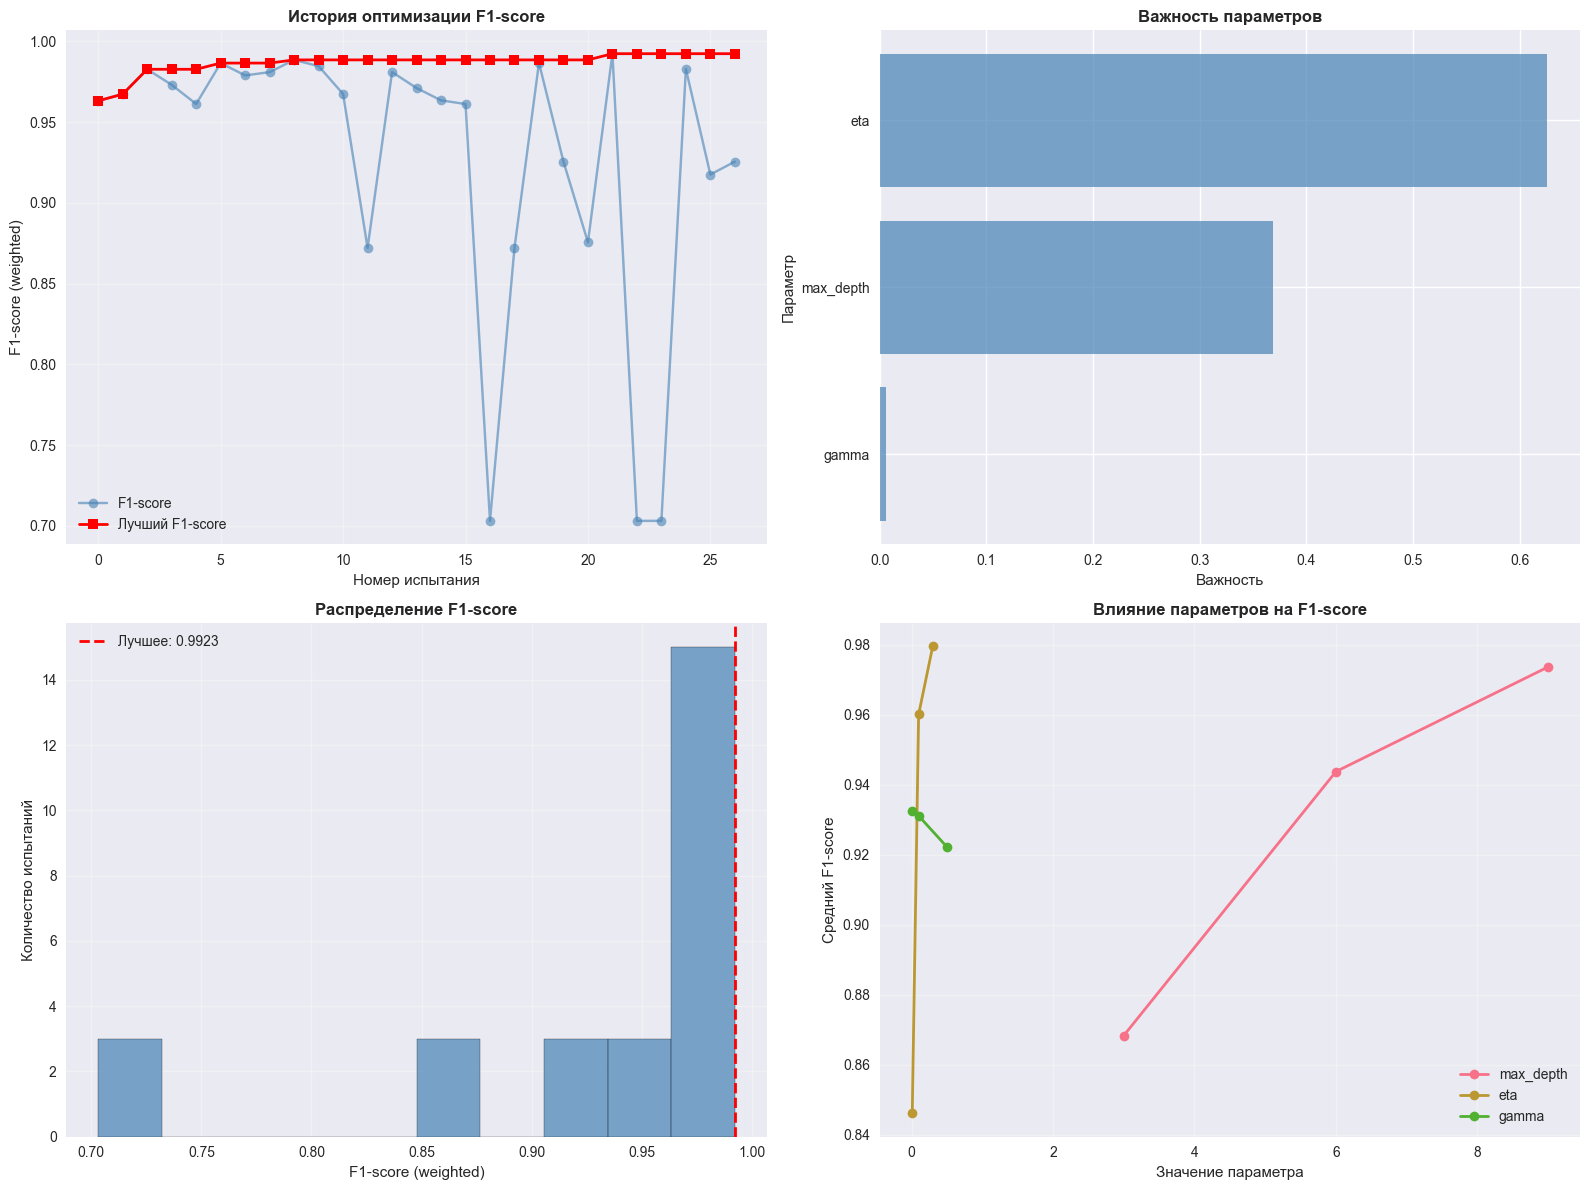

In [ ]:
from optuna.importance import get_param_importances

best_params = study.best_params
best_value = study.best_value

print(f"\nЛучшие параметры:")
print(f"  max_depth: {best_params['max_depth']}")
print(f"  eta (learning_rate): {best_params['eta']}")
print(f"  gamma: {best_params['gamma']}")
print(f"\nЛучший F1-score (weighted): {best_value:.4f}")

print(f"\nВсего испытаний: {len(study.trials)}")
print(f"Лучшее испытание: #{study.best_trial.number}")

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

ax1 = axes[0, 0]
trial_numbers = [trial.number for trial in study.trials if trial.value is not None]
f1_values = [trial.value for trial in study.trials if trial.value is not None]
best_values = []
best_so_far = -float('inf')
for val in f1_values:
    if val > best_so_far:
        best_so_far = val
    best_values.append(best_so_far)
ax1.plot(trial_numbers, f1_values, 'o-', label='F1-score', alpha=0.6, color='steelblue')
ax1.plot(trial_numbers, best_values, 's-', label='Лучший F1-score', linewidth=2, color='red')
ax1.set_xlabel('Номер испытания', fontsize=11)
ax1.set_ylabel('F1-score (weighted)', fontsize=11)
ax1.legend()
ax1.grid(True, alpha=0.3)
ax1.set_title('История оптимизации F1-score', fontsize=12, fontweight='bold')

ax2 = axes[0, 1]
try:
    importances = get_param_importances(study)
    if importances:
        params = list(importances.keys())
        values = list(importances.values())
        ax2.barh(params, values, color='steelblue', alpha=0.7)
        ax2.set_xlabel('Важность', fontsize=11)
        ax2.set_ylabel('Параметр', fontsize=11)
        ax2.invert_yaxis()
        ax2.set_title('Важность параметров', fontsize=12, fontweight='bold')
    else:
        raise ValueError('No importances')
except:
    ax2.text(0.5, 0.5, 'Недостаточно данных\nдля анализа важности', 
             ha='center', va='center', transform=ax2.transAxes, fontsize=12)
    ax2.set_title('Важность параметров', fontsize=12, fontweight='bold')

ax3 = axes[1, 0]
f1_scores = [trial.value for trial in study.trials if trial.value is not None]
ax3.hist(f1_scores, bins=10, alpha=0.7, color='steelblue', edgecolor='black')
ax3.axvline(best_value, color='red', linestyle='--', linewidth=2, label=f'Лучшее: {best_value:.4f}')
ax3.set_xlabel('F1-score (weighted)', fontsize=11)
ax3.set_ylabel('Количество испытаний', fontsize=11)
ax3.set_title('Распределение F1-score', fontsize=12, fontweight='bold')
ax3.legend()
ax3.grid(True, alpha=0.3)

ax4 = axes[1, 1]
params_df = pd.DataFrame([trial.params for trial in study.trials])
params_df['f1_score'] = [trial.value for trial in study.trials if trial.value is not None]

for i, param in enumerate(['max_depth', 'eta', 'gamma']):
    param_data = params_df.groupby(param)['f1_score'].mean()
    ax4.plot(param_data.index, param_data.values, marker='o', label=param, linewidth=2)

ax4.set_xlabel('Значение параметра', fontsize=11)
ax4.set_ylabel('Средний F1-score', fontsize=11)
ax4.set_title('Влияние параметров на F1-score', fontsize=12, fontweight='bold')
ax4.legend()
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [ ]:
best_model = xgb.XGBClassifier(
    max_depth=best_params['max_depth'],
    eta=best_params['eta'],
    gamma=best_params['gamma'],
    random_state=42,
    eval_metric='mlogloss',
    use_label_encoder=False,
    n_estimators=100
)

print(f"\nПараметры финальной модели:")
print(f"  max_depth: {best_params['max_depth']}")
print(f"  eta: {best_params['eta']}")
print(f"  gamma: {best_params['gamma']}")
print(f"  n_estimators: 100")

best_model.fit(X_train_opt, y_train_opt)

y_test_opt_pred = best_model.predict(X_test_opt)
y_train_opt_pred = best_model.predict(X_train_opt)

ОБУЧЕНИЕ ФИНАЛЬНОЙ МОДЕЛИ

Параметры финальной модели:
  max_depth: 6
  eta: 0.3
  gamma: 0.1
  n_estimators: 100

Обучаем модель на 70% данных...
Обучение завершено!

Предсказания выполнены!


ОЦЕНКА ФИНАЛЬНОЙ МОДЕЛИ

Метрики финальной модели:
            Метрика  Train (70%)  Test (30%)
           Accuracy          1.0    0.992293
   F1-Score (Macro)          1.0    0.994341
   F1-Score (Micro)          1.0    0.992293
F1-Score (Weighted)          1.0    0.992337


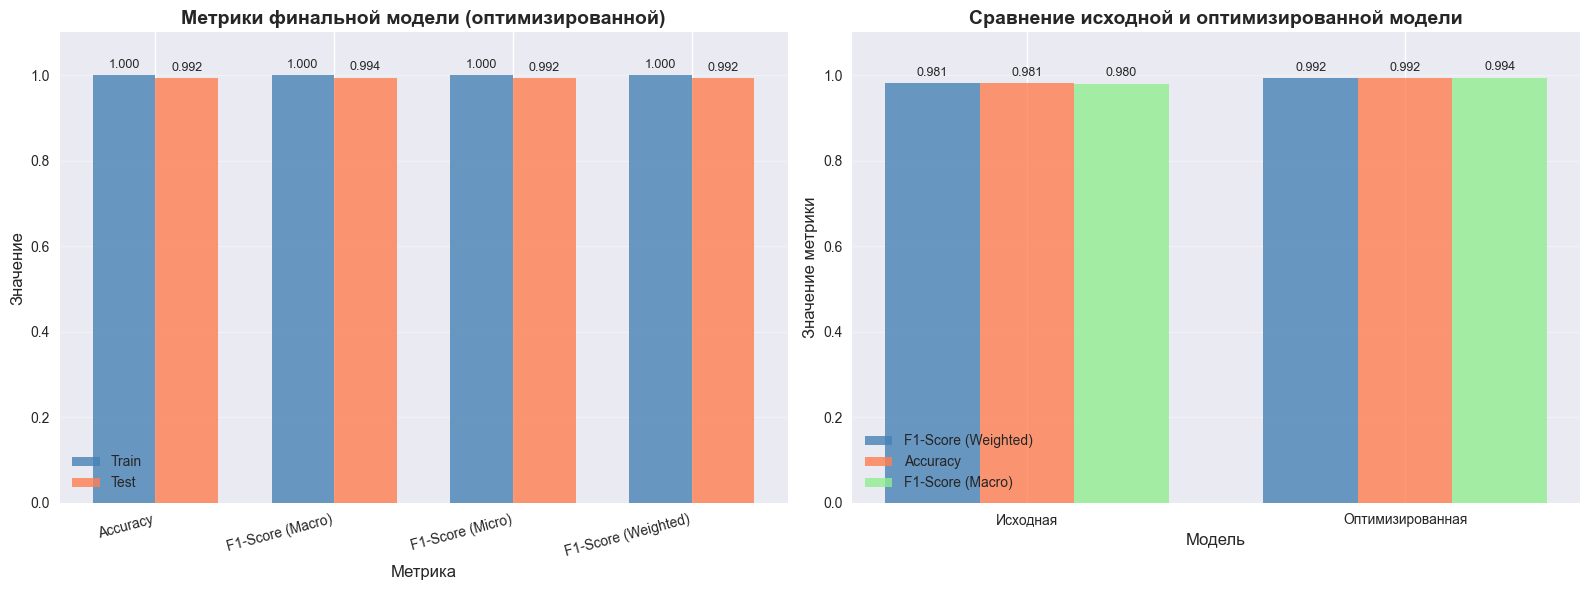

In [ ]:
test_accuracy_opt = accuracy_score(y_test_opt, y_test_opt_pred)
test_f1_macro_opt = f1_score(y_test_opt, y_test_opt_pred, average='macro')
test_f1_micro_opt = f1_score(y_test_opt, y_test_opt_pred, average='micro')
test_f1_weighted_opt = f1_score(y_test_opt, y_test_opt_pred, average='weighted')

train_accuracy_opt = accuracy_score(y_train_opt, y_train_opt_pred)
train_f1_macro_opt = f1_score(y_train_opt, y_train_opt_pred, average='macro')
train_f1_micro_opt = f1_score(y_train_opt, y_train_opt_pred, average='micro')
train_f1_weighted_opt = f1_score(y_train_opt, y_train_opt_pred, average='weighted')

results_df = pd.DataFrame({
    'Метрика': ['Accuracy', 'F1-Score (Macro)', 'F1-Score (Micro)', 'F1-Score (Weighted)'],
    'Train (70%)': [train_accuracy_opt, train_f1_macro_opt, train_f1_micro_opt, train_f1_weighted_opt],
    'Test (30%)': [test_accuracy_opt, test_f1_macro_opt, test_f1_micro_opt, test_f1_weighted_opt]
})

print("\nМетрики финальной модели:")
print(results_df.to_string(index=False))

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

x = np.arange(len(results_df))
width = 0.35

axes[0].bar(x - width/2, results_df['Train (70%)'], width, label='Train', alpha=0.8, color='steelblue')
axes[0].bar(x + width/2, results_df['Test (30%)'], width, label='Test', alpha=0.8, color='coral')

axes[0].set_xlabel('Метрика', fontsize=12)
axes[0].set_ylabel('Значение', fontsize=12)
axes[0].set_title('Метрики финальной модели (оптимизированной)', fontsize=14, fontweight='bold')
axes[0].set_xticks(x)
axes[0].set_xticklabels(results_df['Метрика'], rotation=15, ha='right')
axes[0].legend()
axes[0].grid(True, alpha=0.3, axis='y')
axes[0].set_ylim([0, 1.1])

for i, row in results_df.iterrows():
    axes[0].text(i - width/2, row['Train (70%)'] + 0.01, f"{row['Train (70%)']:.3f}", 
                ha='center', va='bottom', fontsize=9)
    axes[0].text(i + width/2, row['Test (30%)'] + 0.01, f"{row['Test (30%)']:.3f}", 
                ha='center', va='bottom', fontsize=9)

comparison_metrics = pd.DataFrame({
    'Модель': ['Исходная', 'Оптимизированная'],
    'F1-Score (Weighted)': [f1_weighted, test_f1_weighted_opt],
    'Accuracy': [test_accuracy, test_accuracy_opt],
    'F1-Score (Macro)': [f1_macro, test_f1_macro_opt]
})

x2 = np.arange(len(comparison_metrics))
width2 = 0.25

axes[1].bar(x2 - width2, comparison_metrics['F1-Score (Weighted)'], width2, 
            label='F1-Score (Weighted)', alpha=0.8, color='steelblue')
axes[1].bar(x2, comparison_metrics['Accuracy'], width2, 
            label='Accuracy', alpha=0.8, color='coral')
axes[1].bar(x2 + width2, comparison_metrics['F1-Score (Macro)'], width2, 
            label='F1-Score (Macro)', alpha=0.8, color='lightgreen')

axes[1].set_xlabel('Модель', fontsize=12)
axes[1].set_ylabel('Значение метрики', fontsize=12)
axes[1].set_title('Сравнение исходной и оптимизированной модели', fontsize=14, fontweight='bold')
axes[1].set_xticks(x2)
axes[1].set_xticklabels(comparison_metrics['Модель'])
axes[1].legend()
axes[1].grid(True, alpha=0.3, axis='y')
axes[1].set_ylim([0, 1.1])

for i, row in comparison_metrics.iterrows():
    axes[1].text(i - width2, row['F1-Score (Weighted)'] + 0.01, f"{row['F1-Score (Weighted)']:.3f}", 
                ha='center', va='bottom', fontsize=9)
    axes[1].text(i, row['Accuracy'] + 0.01, f"{row['Accuracy']:.3f}", 
                ha='center', va='bottom', fontsize=9)
    axes[1].text(i + width2, row['F1-Score (Macro)'] + 0.01, f"{row['F1-Score (Macro)']:.3f}", 
                ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()


ДЕТАЛЬНЫЙ АНАЛИЗ ОПТИМИЗИРОВАННОЙ МОДЕЛИ

Детальный отчет по классификации (тестовая выборка):
              precision    recall  f1-score   support

         acc       0.97      1.00      0.98       115
        good       1.00      1.00      1.00        21
       unacc       1.00      0.99      0.99       363
       vgood       1.00      1.00      1.00        20

    accuracy                           0.99       519
   macro avg       0.99      1.00      0.99       519
weighted avg       0.99      0.99      0.99       519


Матрица ошибок (Confusion Matrix):
       acc  good  unacc  vgood
acc    115     0      0      0
good     0    21      0      0
unacc    4     0    359      0
vgood    0     0      0     20


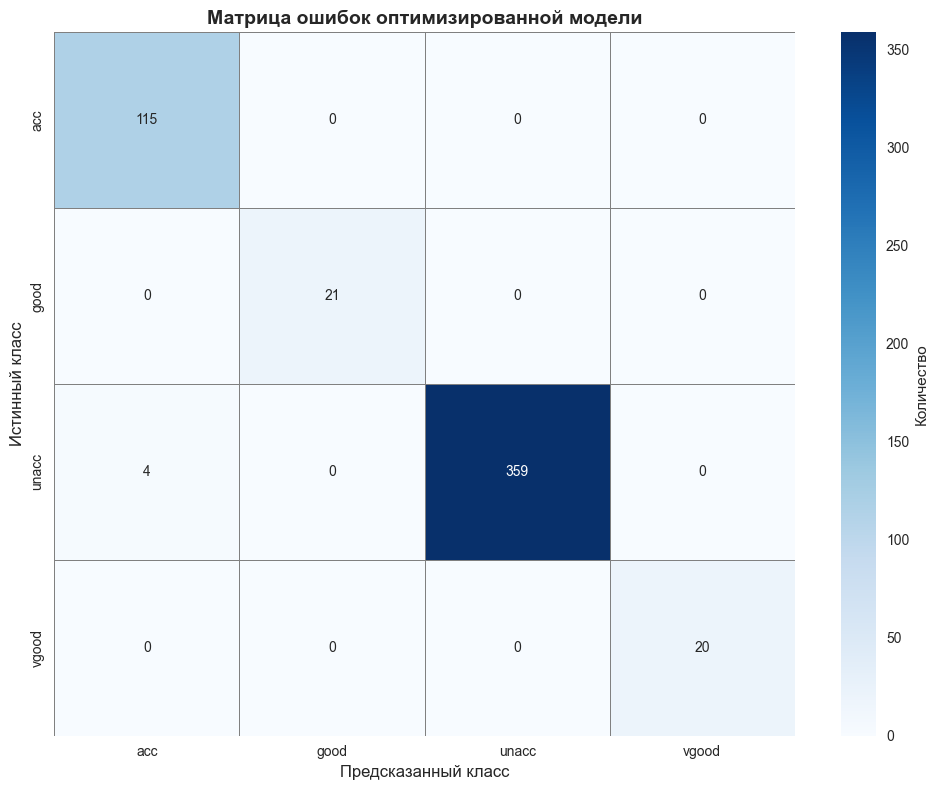


Метрики по классам (оптимизированная модель):
Класс  Precision   Recall  F1-Score
  acc   0.966387 1.000000  0.982906
 good   1.000000 1.000000  1.000000
unacc   1.000000 0.988981  0.994460
vgood   1.000000 1.000000  1.000000


In [ ]:
print("\nДетальный отчет по классификации (тестовая выборка):")
print(classification_report(y_test_opt, y_test_opt_pred, target_names=le_target.classes_))

cm_opt = confusion_matrix(y_test_opt, y_test_opt_pred)
cm_opt_df = pd.DataFrame(cm_opt, 
                         index=le_target.classes_, 
                         columns=le_target.classes_)

print("\nМатрица ошибок (Confusion Matrix):")
print(cm_opt_df)

plt.figure(figsize=(10, 8))
sns.heatmap(cm_opt_df, annot=True, fmt='d', cmap='Blues', 
            cbar_kws={'label': 'Количество'}, 
            linewidths=0.5, linecolor='gray')
plt.title('Матрица ошибок оптимизированной модели', fontsize=14, fontweight='bold')
plt.xlabel('Предсказанный класс', fontsize=12)
plt.ylabel('Истинный класс', fontsize=12)
plt.tight_layout()
plt.show()

f1_per_class_opt = f1_score(y_test_opt, y_test_opt_pred, average=None, labels=range(len(le_target.classes_)))
precision_per_class_opt = precision_score(y_test_opt, y_test_opt_pred, average=None, labels=range(len(le_target.classes_)))
recall_per_class_opt = recall_score(y_test_opt, y_test_opt_pred, average=None, labels=range(len(le_target.classes_)))

metrics_opt_df = pd.DataFrame({
    'Класс': le_target.classes_,
    'Precision': precision_per_class_opt,
    'Recall': recall_per_class_opt,
    'F1-Score': f1_per_class_opt
})

print("\nМетрики по классам:")
print(metrics_opt_df.to_string(index=False))


In [ ]:
print(f"\n1. Лучшие параметры:")
print(f"   max_depth: {best_params['max_depth']}")
print(f"   eta (learning_rate): {best_params['eta']}")
print(f"   gamma: {best_params['gamma']}")

ИТОГОВАЯ СВОДКА ОПТИМИЗАЦИИ

1. Лучшие параметры:
   max_depth: 6
   eta (learning_rate): 0.3
   gamma: 0.1

2. Результаты оптимизации:
   Лучший F1-score (weighted) в оптимизации: 0.9923
   F1-score (weighted) на тестовой выборке: 0.9923

3. Сравнение с исходной моделью:
   Исходная модель F1-score (weighted): 0.9809
   Оптимизированная модель F1-score (weighted): 0.9923
   ✓ Улучшение: +0.0114 (1.14%)

4. Метрики на тестовой выборке (30%):
   Accuracy: 0.9923
   F1-Score (Macro): 0.9943
   F1-Score (Micro): 0.9923
   F1-Score (Weighted): 0.9923

5. Метрики на обучающей выборке (70%):
   Accuracy: 1.0000
   F1-Score (Macro): 1.0000
   F1-Score (Micro): 1.0000
   F1-Score (Weighted): 1.0000

6. Разница между train и test:
   F1-Score (Weighted): 0.0077
   ✓ Модель хорошо обобщается (разница < 5%)

7. Всего испытаний в оптимизации: 27
   Комбинаций параметров: 3 * 3 * 3 = 27

ОПТИМИЗАЦИЯ ЗАВЕРШЕНА УСПЕШНО!


In [70]:
print(f"\n2. Результаты оптимизации:")
print(f"   Лучший F1-score (weighted) в оптимизации: {best_value:.4f}")
print(f"   F1-score (weighted) на тестовой выборке: {test_f1_weighted_opt:.4f}")


2. Результаты оптимизации:
   Лучший F1-score (weighted) в оптимизации: 0.9923
   F1-score (weighted) на тестовой выборке: 0.9923


In [71]:
print(f"\n3. Сравнение с исходной моделью:")
improvement = test_f1_weighted_opt - f1_weighted
print(f"   Исходная модель F1-score (weighted): {f1_weighted:.4f}")
print(f"   Оптимизированная модель F1-score (weighted): {test_f1_weighted_opt:.4f}")
if improvement > 0:
    print(f"   ✓ Улучшение: +{improvement:.4f} ({improvement*100:.2f}%)")
elif improvement < 0:
    print(f"   ⚠ Ухудшение: {improvement:.4f} ({improvement*100:.2f}%)")
else:
    print(f"   = Без изменений")


3. Сравнение с исходной моделью:
   Исходная модель F1-score (weighted): 0.9809
   Оптимизированная модель F1-score (weighted): 0.9923
   ✓ Улучшение: +0.0114 (1.14%)


In [77]:
print(f"\n4. Метрики на тестовой выборке (30%):")
print(f"   Accuracy: {test_accuracy_opt:.4f}")
print(f"   F1-Score (Macro): {test_f1_macro_opt:.4f}")
print(f"   F1-Score (Micro): {test_f1_micro_opt:.4f}")
print(f"   F1-Score (Weighted): {test_f1_weighted_opt:.4f}")


4. Метрики на тестовой выборке (30%):
   Accuracy: 0.9923
   F1-Score (Macro): 0.9943
   F1-Score (Micro): 0.9923
   F1-Score (Weighted): 0.9923

4. Метрики на тестовой выборке (30%):
   Accuracy: 0.9923
   F1-Score (Macro): 0.9943
   F1-Score (Micro): 0.9923
   F1-Score (Weighted): 0.9923


In [73]:
print(f"\n5. Метрики на обучающей выборке (70%):")
print(f"   Accuracy: {train_accuracy_opt:.4f}")
print(f"   F1-Score (Macro): {train_f1_macro_opt:.4f}")
print(f"   F1-Score (Micro): {train_f1_micro_opt:.4f}")
print(f"   F1-Score (Weighted): {train_f1_weighted_opt:.4f}")


5. Метрики на обучающей выборке (70%):
   Accuracy: 1.0000
   F1-Score (Macro): 1.0000
   F1-Score (Micro): 1.0000
   F1-Score (Weighted): 1.0000


In [74]:
print(f"\n6. Разница между train и test:")
overfit_check = train_f1_weighted_opt - test_f1_weighted_opt
print(f"   F1-Score (Weighted): {overfit_check:.4f}")
if abs(overfit_check) < 0.05:
    print(f"   ✓ Модель хорошо обобщается (разница < 5%)")
elif overfit_check > 0.1:
    print(f"   ⚠ Возможен переобучение (разница > 10%)")
else:
    print(f"   ✓ Модель показывает стабильные результаты")


6. Разница между train и test:
   F1-Score (Weighted): 0.0077
   ✓ Модель хорошо обобщается (разница < 5%)


In [ ]:
print(f"\n7. Всего испытаний в оптимизации: {len(study.trials)}")


7. Всего испытаний в оптимизации: 27
   Комбинаций параметров: 3 * 3 * 3 = 27
